# Subproject c
- Test for independence of selected survey responses
- Author: Roberto P. (GitHub: Roberto919) (mail: robertosysm@gmail.com)

---

# Imports

#### Python libraries

In [1]:
import pandas as pd

import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.stats import chi2_contingency, chi2

import numpy as np

#### Ancillary modules

In [2]:
## Reloading module
%load_ext autoreload
%autoreload 2

from Sp_c_params import *
from Sp_c_funcs import *

---

# Upload and clean data

In [3]:
df = pd.read_csv(os.path.join(relative_data_loc, file_name))

In [4]:
cleaning_df(df)

In [5]:
df

,ID,Considera_tele,Cree_comun_tele,Pagar_cuanto,Regularidad_uso
0,4,NO,1: No será común,No pagaría por una,1: No la utilizaría
1,5,NO,2: Poco común,Menos de $100,2: Con poca regularidad
2,6,NO,2: Poco común,Menos de $750,2: Con poca regularidad
3,7,SI,3: Neutral,No pagaría por una,1: No la utilizaría
4,8,NO,2: Poco común,Menos de $100,1: No la utilizaría
...,...,...,...,...,...
749,753,NO,5: Totalmente Común,Más de $750,5: Regularmente
750,754,SI,5: Totalmente Común,Más de $750,5: Regularmente
751,755,SI,5: Totalmente Común,Más de $750,5: Regularmente
752,756,SI,2: Poco común,Menos de $100,3: Neutral


---

# Initial data exploration

In [6]:
dfx = df.copy()

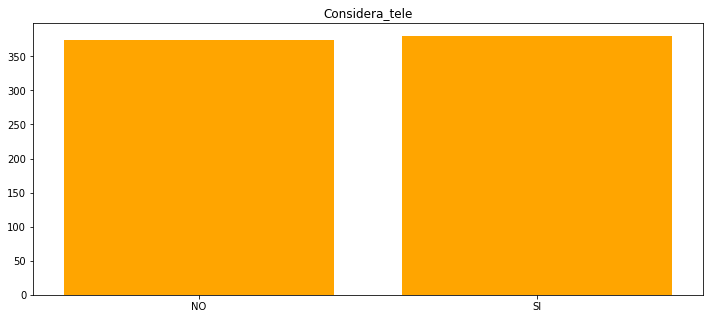

                 ID      Prop
Considera_tele               
NO              374  0.496021
SI              380  0.503979


In [7]:
ct_var = ['ID']
bar_var = ['Considera_tele']
color='orange'

one_bar_graph(dfx, ct_var, bar_var, color)
var_count_summary(dfx, ct_var, bar_var)

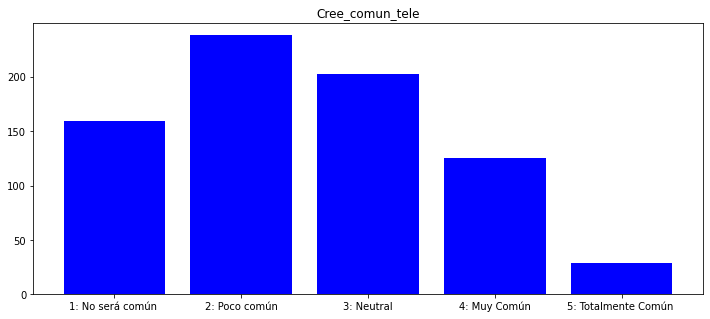

                       ID      Prop
Cree_comun_tele                    
1: No será común      159  0.210875
2: Poco común         238  0.315650
3: Neutral            203  0.269231
4: Muy Común          125  0.165782
5: Totalmente Común    29  0.038462


In [8]:
ct_var = ['ID']
bar_var = ['Cree_comun_tele']
color='blue'

one_bar_graph(dfx, ct_var, bar_var, color)
var_count_summary(dfx, ct_var, bar_var)

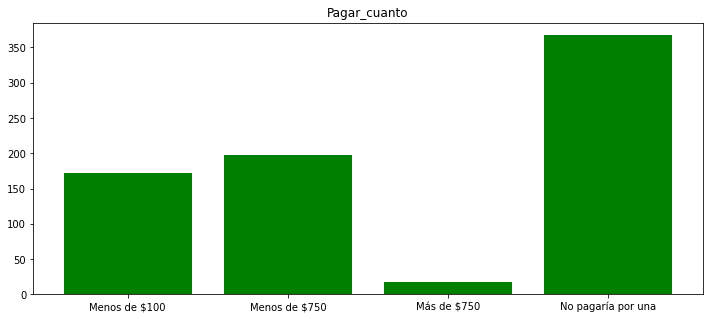

                     ID      Prop
Pagar_cuanto                     
Menos de $100       172  0.228117
Menos de $750       197  0.261273
Más de $750          18  0.023873
No pagaría por una  367  0.486737


In [9]:
ct_var = ['ID']
bar_var = ['Pagar_cuanto']
color='green'

one_bar_graph(dfx, ct_var, bar_var, color)
var_count_summary(dfx, ct_var, bar_var)

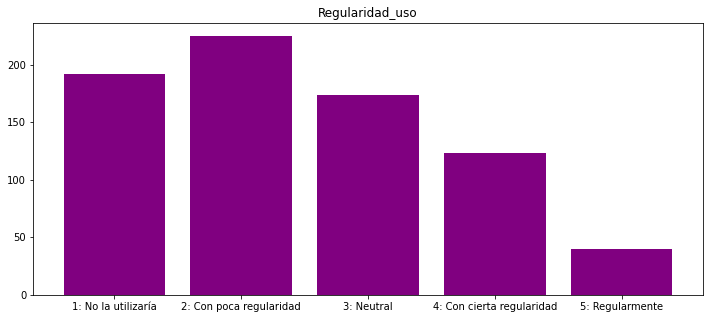

                            ID      Prop
Regularidad_uso                         
1: No la utilizaría        192  0.254642
2: Con poca regularidad    225  0.298408
3: Neutral                 174  0.230769
4: Con cierta regularidad  123  0.163130
5: Regularmente             40  0.053050


In [10]:
ct_var = ['ID']
bar_var = ['Regularidad_uso']
color='purple'

one_bar_graph(dfx, ct_var, bar_var, color)
var_count_summary(dfx, ct_var, bar_var)

---

# Test 1: chi-square test of independece
- **Variable 1:** doctors' expected use regularity of the platform
- **Variable 2:** doctors' perception about their patients interest to take virtual medical sessions
- $\alpha \text{ (significance)} = 0.1$

$$H_0: \text{the two variables are independent}$$
$$H_1: \text{the two variables are dependent}$$

### Input data

In [11]:
alpha = 0.1

### Variables crossing

In [12]:
rc = [
    'Cree_comun_tele',
    'Regularidad_uso',
]

ct_col = ['ID']

In [13]:
dfx = vars_cross_df(df, ct_col, rc)
dfx

Regularidad_uso,1: No la utilizaría,2: Con poca regularidad,3: Neutral,4: Con cierta regularidad,5: Regularmente
Cree_comun_tele,,,,,
1: No será común,108.0,37.0,12.0,0.0,2.0
2: Poco común,43.0,134.0,43.0,16.0,2.0
3: Neutral,24.0,43.0,97.0,35.0,4.0
4: Muy Común,11.0,11.0,20.0,67.0,16.0
5: Totalmente Común,6.0,0.0,2.0,5.0,16.0


### $\chi^2$ value, p-value, degrees of freedom and expected values

In [14]:
chi, pval, dof, exp_v = chi2_contingency(dfx)

In [15]:
exp_v = pd.DataFrame(exp_v, index=[dfx.index], columns=dfx.columns).round(2)
exp_v

Regularidad_uso,1: No la utilizaría,2: Con poca regularidad,3: Neutral,4: Con cierta regularidad,5: Regularmente
Cree_comun_tele,,,,,
1: No será común,40.49,47.45,36.69,25.94,8.44
2: Poco común,60.60,71.02,54.92,38.82,12.63
3: Neutral,51.69,60.58,46.85,33.12,10.77
4: Muy Común,31.83,37.30,28.85,20.39,6.63
5: Totalmente Común,7.38,8.65,6.69,4.73,1.54


### Critical value

In [16]:
p = 1 - alpha

In [17]:
c_v = chi2.ppf(p, dof)
c_v

23.541828923096105

### Conclusion

In [18]:
if pval < alpha:
    print("At {} level of significance, we reject the null hypotheses and accept the alternative hypoteses.".format(alpha))
    print("The two variables are dependent.")
else:
    print("At {} level of significance, we accept the null hypotheses.".format(alpha))
    print("The two variables are independent")

At 0.1 level of significance, we reject the null hypotheses and accept the alternative hypoteses.
The two variables are dependent.


---

# Test 2: chi-square test of independece
- **Variable 1:** doctors' perception about the future of telemedicine
- **Variable 2:** doctors' willingness to pay for a telemedicine platform
- $\alpha \text{ (significance)} = 0.1$

$$H_0: \text{the two variables are independent}$$
$$H_1: \text{the two variables are dependent}$$

### Input data

In [19]:
alpha = 0.1

### Variables crossing

In [20]:
rc = [
    'Considera_tele',
    'Pagar_cuanto',
]

ct_col = ['ID']

In [21]:
dfx = vars_cross_df(df, ct_col, rc)
dfx

Pagar_cuanto,Menos de $100,Menos de $750,Más de $750,No pagaría por una
Considera_tele,,,,
NO,55,59,2,258
SI,117,138,16,109


### $\chi^2$ value, p-value, degrees of freedom and expected values

In [22]:
chi, pval, dof, exp_v = chi2_contingency(dfx)

In [23]:
exp_v = pd.DataFrame(exp_v, index=[dfx.index], columns=dfx.columns).round(2)
exp_v

Pagar_cuanto,Menos de $100,Menos de $750,Más de $750,No pagaría por una
Considera_tele,,,,
NO,85.32,97.72,8.93,182.04
SI,86.68,99.28,9.07,184.96


### Critical value

In [24]:
p = 1 - alpha

In [25]:
c_v = chi2.ppf(p, dof)
c_v

6.251388631170325

### Conclusion

In [26]:
if pval < alpha:
    print("At {} level of significance, we reject the null hypotheses and accept the alternative hypoteses.".format(alpha))
    print("The two variables are dependent.")
else:
    print("At {} level of significance, we accept the null hypotheses.".format(alpha))
    print("The two variables are independent")

At 0.1 level of significance, we reject the null hypotheses and accept the alternative hypoteses.
The two variables are dependent.


---

# Test 3: chi-square test of independece
- **Variable 1:** doctors' perception about their patients interest to take virtual medical sessions
- **Variable 2:** doctors' willingness to pay for a telemedicine platform
- $\alpha \text{ (significance)} = 0.1$

$$H_0: \text{the two variables are independent}$$
$$H_1: \text{the two variables are dependent}$$

### Input data

In [27]:
alpha = 0.1

### Variables crossing

In [28]:
rc = [
    'Cree_comun_tele',
    'Pagar_cuanto',
]

ct_col = ['ID']

In [29]:
dfx = vars_cross_df(df, ct_col, rc)
dfx

Pagar_cuanto,Menos de $100,Menos de $750,Más de $750,No pagaría por una
Cree_comun_tele,,,,
1: No será común,18.0,23.0,1.0,117.0
2: Poco común,58.0,52.0,0.0,128.0
3: Neutral,56.0,61.0,4.0,82.0
4: Muy Común,32.0,51.0,9.0,33.0
5: Totalmente Común,8.0,10.0,4.0,7.0


### $\chi^2$ value, p-value, degrees of freedom and expected values

In [30]:
chi, pval, dof, exp_v = chi2_contingency(dfx)

In [31]:
exp_v = pd.DataFrame(exp_v, index=[dfx.index], columns=dfx.columns).round(2)
exp_v

Pagar_cuanto,Menos de $100,Menos de $750,Más de $750,No pagaría por una
Cree_comun_tele,,,,
1: No será común,36.27,41.54,3.80,77.39
2: Poco común,54.29,62.18,5.68,115.84
3: Neutral,46.31,53.04,4.85,98.81
4: Muy Común,28.51,32.66,2.98,60.84
5: Totalmente Común,6.62,7.58,0.69,14.12


### Critical value

In [32]:
p = 1 - alpha

In [33]:
c_v = chi2.ppf(p, dof)
c_v

18.54934778670325

### Conclusion

In [34]:
if pval < alpha:
    print("At {} level of significance, we reject the null hypotheses and accept the alternative hypoteses.".format(alpha))
    print("The two variables are dependent.")
else:
    print("At {} level of significance, we accept the null hypotheses.".format(alpha))
    print("The two variables are independent")

At 0.1 level of significance, we reject the null hypotheses and accept the alternative hypoteses.
The two variables are dependent.


---
---